/var/folders/l9/7x451g6n2y91ptkr7k4fy6fr0000gn/T/ipykernel_38644/271683803.py:33: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax_orig.stem(range(1, 11), original_sample, basefmt=" ", use_line_collection=True)
/var/folders/l9/7x451g6n2y91ptkr7k4fy6fr0000gn/T/ipykernel_38644/271683803.py:43: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(range(1, 11), bootstrap_samples[i], basefmt=" ", use_line_collection=True)
/var/folders/l9/7x451g6n2y91ptkr7k4fy6fr0000gn/T/ipykernel_38644/271683803.py:53: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem(

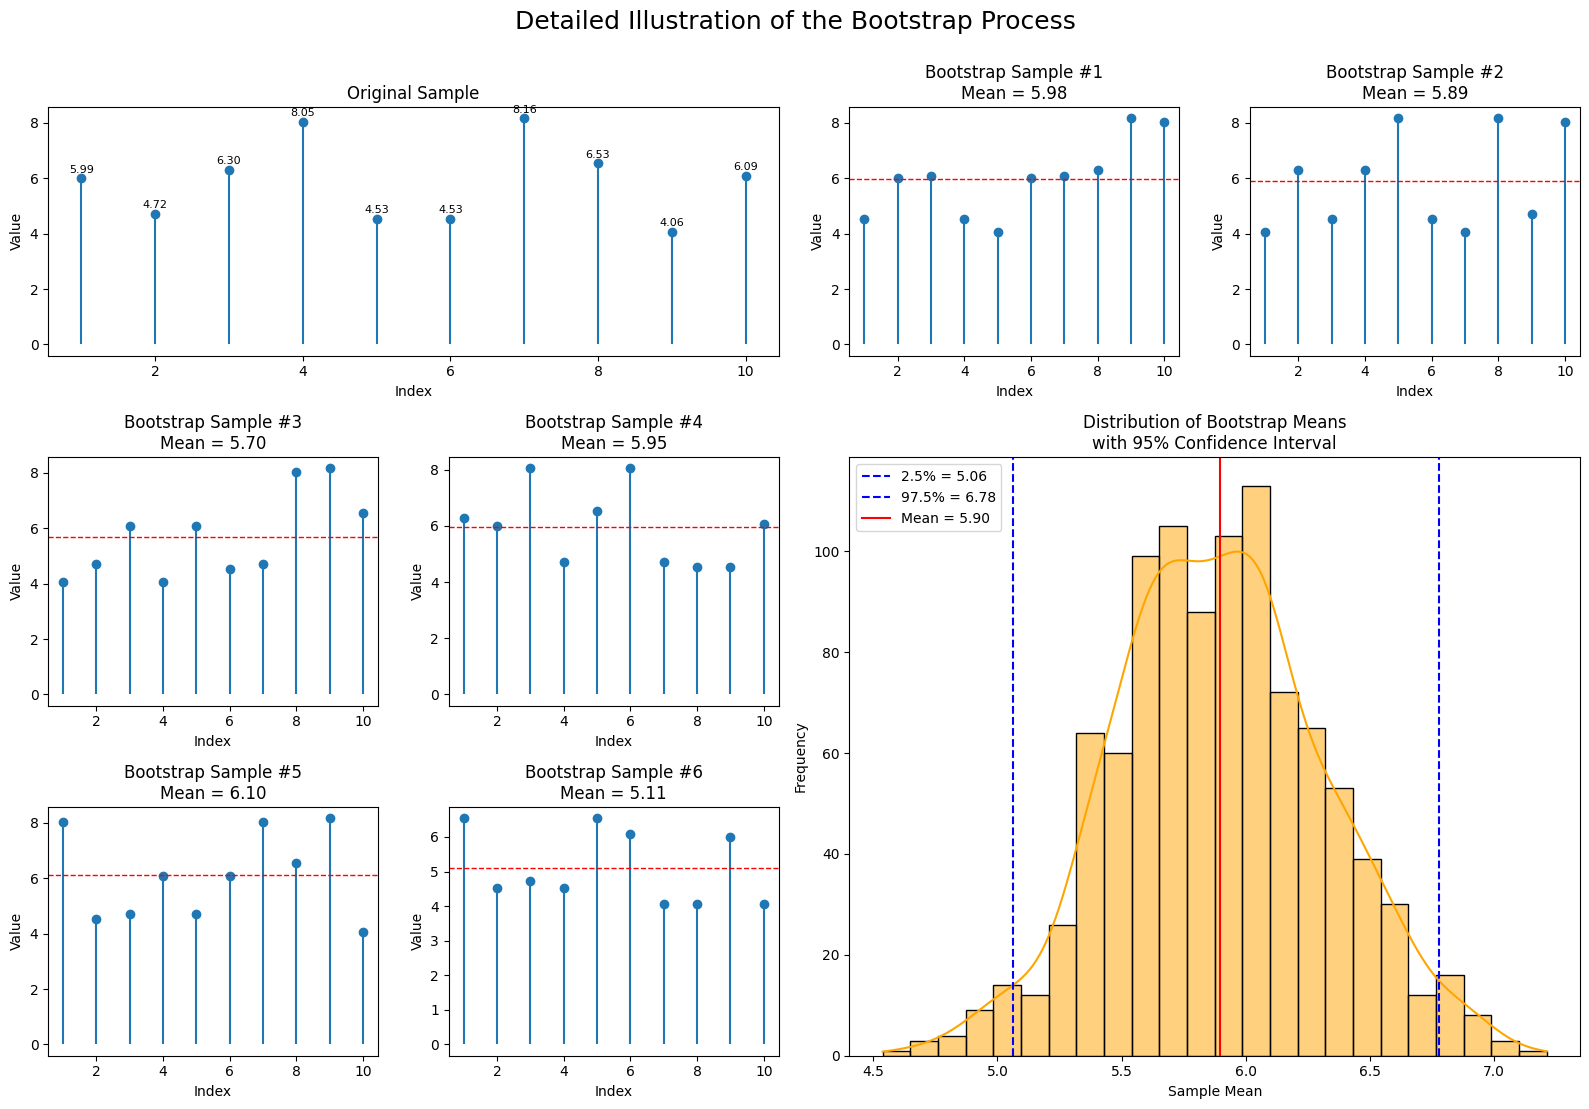

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Set random seed
np.random.seed(42)

# Original sample
original_sample = np.random.normal(loc=5, scale=2, size=10)

# Generate 1000 bootstrap samples and compute their means
bootstrap_means = []
bootstrap_samples = []

for _ in range(1000):
    sample = np.random.choice(original_sample, size=10, replace=True)
    bootstrap_means.append(np.mean(sample))
    if len(bootstrap_samples) < 6:
        bootstrap_samples.append(sample)

# Compute 95% confidence interval for the mean
lower_ci, upper_ci = np.percentile(bootstrap_means, [2.5, 97.5])
mean_of_means = np.mean(bootstrap_means)

# Create a new layout with the described structure
fig = plt.figure(figsize=(16, 12))
gs = GridSpec(3, 4, figure=fig)
fig.suptitle("Detailed Illustration of the Bootstrap Process", fontsize=18, y=0.95)

# Top-left: Original sample spans two columns
ax_orig = fig.add_subplot(gs[0, 0:2])
ax_orig.stem(range(1, 11), original_sample, basefmt=" ", use_line_collection=True)
for i, val in enumerate(original_sample):
    ax_orig.text(i + 1, val + 0.2, f"{val:.2f}", ha='center', fontsize=8)
ax_orig.set_title("Original Sample")
ax_orig.set_xlabel("Index")
ax_orig.set_ylabel("Value")

# Top-right: Bootstrap samples 1 & 2
for i in range(2):
    ax = fig.add_subplot(gs[0, 2 + i])
    ax.stem(range(1, 11), bootstrap_samples[i], basefmt=" ", use_line_collection=True)
    sample_mean = np.mean(bootstrap_samples[i])
    ax.axhline(sample_mean, color='red', linestyle='--', linewidth=1)
    ax.set_title(f"Bootstrap Sample #{i+1}\nMean = {sample_mean:.2f}")
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")

# Middle-left: Bootstrap samples 3 & 4
for i in range(2, 4):
    ax = fig.add_subplot(gs[1, i - 2])
    ax.stem(range(1, 11), bootstrap_samples[i], basefmt=" ", use_line_collection=True)
    sample_mean = np.mean(bootstrap_samples[i])
    ax.axhline(sample_mean, color='red', linestyle='--', linewidth=1)
    ax.set_title(f"Bootstrap Sample #{i+1}\nMean = {sample_mean:.2f}")
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")

# Bottom-left: Bootstrap samples 5 & 6
for i in range(4, 6):
    ax = fig.add_subplot(gs[2, i - 4])
    ax.stem(range(1, 11), bootstrap_samples[i], basefmt=" ", use_line_collection=True)
    sample_mean = np.mean(bootstrap_samples[i])
    ax.axhline(sample_mean, color='red', linestyle='--', linewidth=1)
    ax.set_title(f"Bootstrap Sample #{i+1}\nMean = {sample_mean:.2f}")
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")

# Right: Merge last 2 columns in middle and bottom rows for the distribution
ax_dist = fig.add_subplot(gs[1:, 2:])
sns.histplot(bootstrap_means, kde=True, ax=ax_dist, color='orange')
ax_dist.axvline(lower_ci, color='blue', linestyle='--', label=f"2.5% = {lower_ci:.2f}")
ax_dist.axvline(upper_ci, color='blue', linestyle='--', label=f"97.5% = {upper_ci:.2f}")
ax_dist.axvline(mean_of_means, color='red', linestyle='-', label=f"Mean = {mean_of_means:.2f}")
ax_dist.set_title("Distribution of Bootstrap Means\nwith 95% Confidence Interval")
ax_dist.set_xlabel("Sample Mean")
ax_dist.set_ylabel("Frequency")
ax_dist.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("bootstrap_illustration.png", dpi=300)  # 保存为高分辨率 PNG
plt.show()